# Assignment 5: Pandas Fundamentals with Earthquake Data
# Yianna Bekris
# RCES
# 3/19/2024

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
eq_df = pd.read_csv("http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv")

In [4]:
eq_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake


In [5]:
eq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


In [6]:
eq_df['time'] = pd.to_datetime(eq_df['time'])

In [7]:
eq_df.set_index('id', inplace=True)

In [8]:
eq_df.describe()

,time,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,2014-07-05 09:10:37.116720128,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
min,2014-01-01 00:01:16.610000,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,2014-04-08 03:43:10.768999936,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,2014-07-07 10:44:06.035000064,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,2014-09-30 23:36:40.595000064,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,2014-12-31 23:54:33.900000,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000
std,NaN,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046


In [9]:
eq_df["mag"].nlargest(20)

id
usc000nzvd    8.2
usc000rki5    7.9
usc000p27i    7.7
usc000phx5    7.6
usb000pr89    7.5
usc000piqj    7.4
usb000slwn    7.3
usb000pq41    7.2
usc000pft9    7.1
usc000sxh8    7.1
usc000stdc    7.1
usb000sk6k    7.0
usc000mnvj    6.9
usc000nzwm    6.9
usb000r2hc    6.9
usc000rngj    6.9
usc000rkg5    6.9
usb000ruzk    6.9
usc000rr6a    6.9
usb000rzki    6.9
Name: mag, dtype: float64

In [10]:
eq_df["place"].head()
# The "place" column has the state and country information as the
# last part of the string, after a comma. This should be easy to 
# extract by using str.split with the seperator as " ," and the 
# last index of the resulting list.

id
ak11155107    26km S of Redoubt Volcano, Alaska
nn00436847              32km S of Alamo, Nevada
ak11151142     12km NNW of North Nenana, Alaska
ak11151135           22km S of Cantwell, Alaska
ci37171541         10km WNW of Progreso, Mexico
Name: place, dtype: object

In [11]:
eq_df["country"] = eq_df["place"].str.split(" ,").str.get(-1)

In [12]:
eq_df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type,country
id,,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake,"26km S of Redoubt Volcano, Alaska"
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake,"32km S of Alamo, Nevada"
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake,"12km NNW of North Nenana, Alaska"
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake,"22km S of Cantwell, Alaska"
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake,"10km WNW of Progreso, Mexico"


In [13]:
eq_df["country"].unique()

array(['26km S of Redoubt Volcano, Alaska', '32km S of Alamo, Nevada',
       '12km NNW of North Nenana, Alaska', ...,
       '37km ESE of Santiago, Philippines',
       '40km ENE of Lucerne Valley, California',
       "11km ESE of Roshtqal'a, Tajikistan"], dtype=object)

In [14]:
eq_df_4_mag = eq_df[eq_df['mag'] >= 4.0]

In [15]:
eq_counts = eq_df_4_mag['country'].value_counts()

In [16]:
eq_counts.head()

country
South of the Fiji Islands      306
Northern Mid-Atlantic Ridge    126
Carlsberg Ridge                 97
Mid-Indian Ridge                82
Central Mid-Atlantic Ridge      78
Name: count, dtype: int64

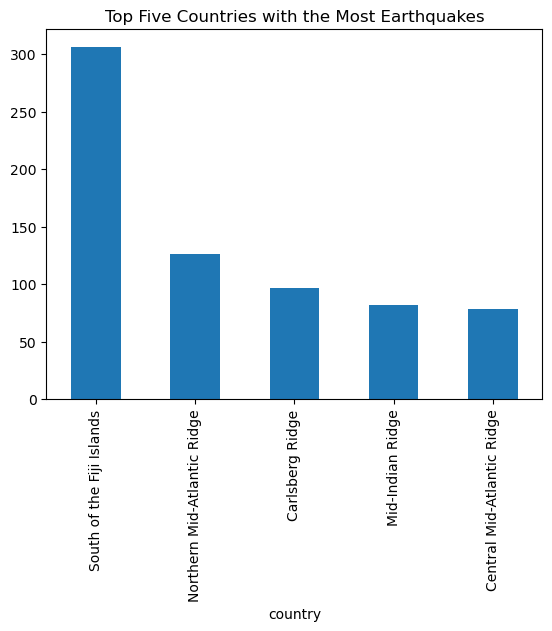

In [17]:
eq_counts.head(5).plot(kind='bar');
plt.title("Top Five Countries with the Most Earthquakes");

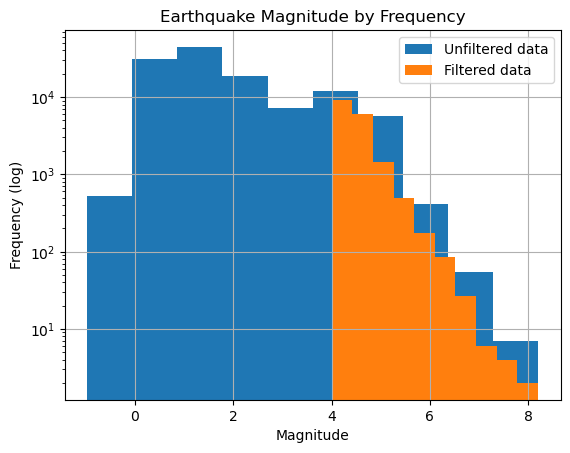

In [18]:
eq_df["mag"].hist(label="Unfiltered data");
eq_df_4_mag["mag"].hist(label="Filtered data");
plt.yscale("log");
plt.legend();
plt.xlabel("Magnitude");
plt.ylabel("Frequency (log)");
plt.title("Earthquake Magnitude by Frequency");
# The filtered data appears to be in the the tail of the distribution
# of the unfiltered data

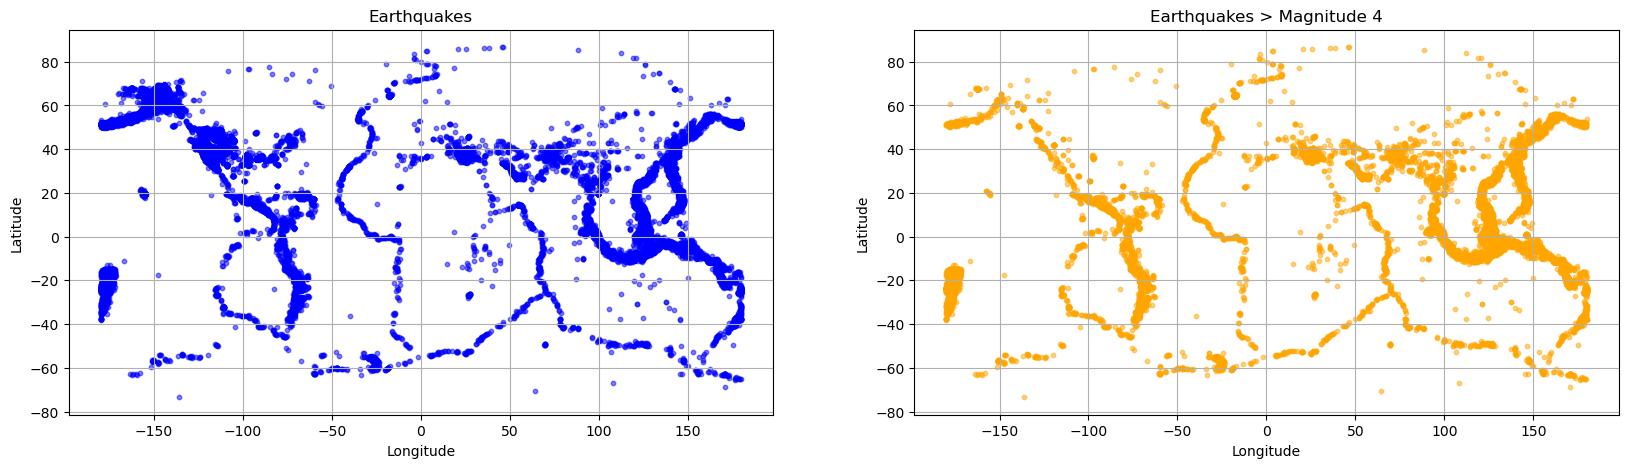

In [20]:
plt.figure(figsize=(20, 5))
plt.subplot(1,2,1)
plt.scatter(eq_df['longitude'], eq_df['latitude'], s=10, color='blue', alpha=0.5)
plt.title('Earthquakes')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)

plt.subplot(1,2,2)
plt.scatter(eq_df_4_mag['longitude'], eq_df_4_mag['latitude'], s=10, color='orange', alpha=0.5)
plt.title('Earthquakes > Magnitude 4')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
# In the unfiltered dataset, there are many more earthquakes in the western US and Canada, and North America in general.
# Across the rest of the world however, the number of earthquakes plotted appears to be similar.
# This might mean that there is better detection in the US and Canada.